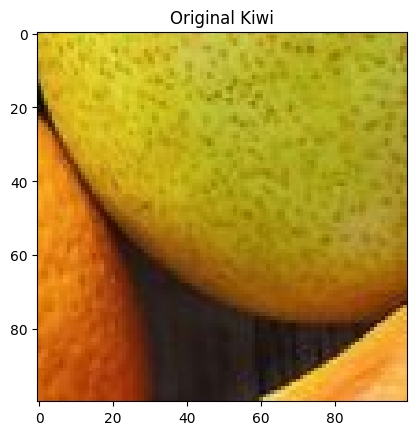

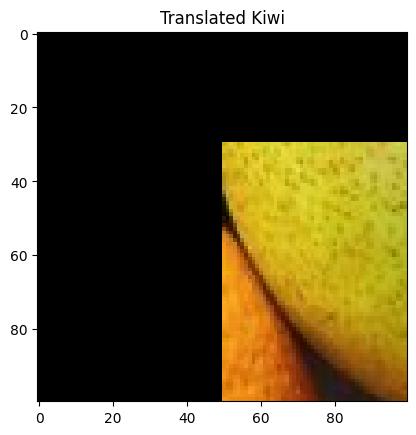

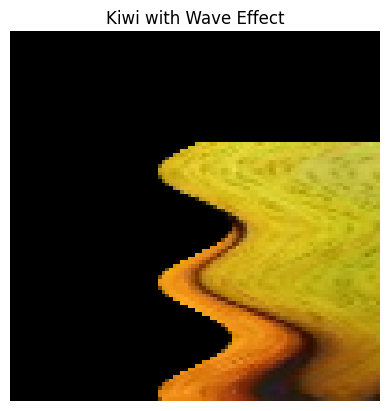

In [1]:
# Bài 1: Tịnh tiến và áp dụng hiệu ứng sóng cho quả kiwi
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc ảnh gốc
img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Cắt quả kiwi bên trái hình (ước lượng vùng 380:480, 170:270)
kiwi = img[380:480, 170:270]
plt.imshow(kiwi)
plt.title('Original Kiwi')
plt.show()

# Tịnh tiến quả kiwi 50 pixel sang phải, 30 pixel xuống
translated = nd.shift(kiwi, shift=(30, 50, 0))
plt.imshow(translated)
plt.title('Translated Kiwi')
plt.show()

# Tạo hiệu ứng sóng bằng map_coordinates với hàm sin
rows, cols, _ = translated.shape
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
offset = 10 * np.sin(2 * np.pi * Y / 30)
X_warped = X + offset
Y_warped = Y

# Chuẩn bị tọa độ để map lại từng kênh màu
coords = np.array([Y_warped, X_warped])
warped = np.zeros_like(translated)
for i in range(3):
    warped[..., i] = nd.map_coordinates(translated[..., i], coords, order=1, mode='reflect')

# Hiển thị kết quả sau khi biến dạng sóng
plt.imshow(warped)
plt.title('Kiwi with Wave Effect')
plt.axis('off')
plt.show()

# Lưu kết quả
iio.imsave('kiwi_wave.jpg', warped.astype(np.uint8))


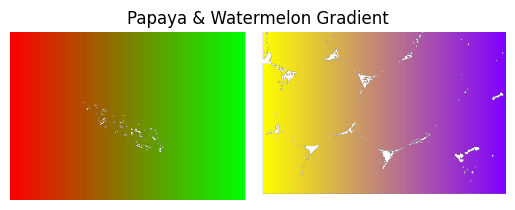

In [4]:
# Bài 2: Tạo gradient màu cho đu đủ và dưa hấu, ghép nền trong suốt

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh quả đu đủ và dưa hấu từ file
papaya = iio.imread('exercise/papaya.jpg')       # Kích thước khoảng 200x200
watermelon = iio.imread('exercise/watermelon.jpg')  # Kích thước khoảng 200x200

# Tạo gradient đỏ → xanh lá cho đu đủ
h1, w1, _ = papaya.shape
gradient_papaya = np.zeros((h1, w1, 3), dtype=np.uint8)
gradient_papaya[..., 0] = np.tile(np.linspace(255, 0, w1, dtype=np.uint8), (h1, 1))   # R giảm
gradient_papaya[..., 1] = np.tile(np.linspace(0, 255, w1, dtype=np.uint8), (h1, 1))   # G tăng
gradient_papaya[..., 2] = 0                                                           # B = 0

# Áp màu gradient vào ảnh đu đủ
mask_papaya = (papaya.mean(axis=2) > 10).astype(np.uint8)[..., None]
papaya_colored = gradient_papaya * mask_papaya

# Tạo gradient vàng → tím cho dưa hấu
h2, w2, _ = watermelon.shape
gradient_watermelon = np.zeros((h2, w2, 3), dtype=np.uint8)
gradient_watermelon[..., 0] = np.tile(np.linspace(255, 128, w2, dtype=np.uint8), (h2, 1))   # R
gradient_watermelon[..., 1] = np.tile(np.linspace(255, 0, w2, dtype=np.uint8), (h2, 1))     # G
gradient_watermelon[..., 2] = np.tile(np.linspace(0, 255, w2, dtype=np.uint8), (h2, 1))     # B

# Áp màu gradient vào ảnh dưa hấu
mask_watermelon = (watermelon.mean(axis=2) > 10).astype(np.uint8)[..., None]
watermelon_colored = gradient_watermelon * mask_watermelon

# Tạo canvas trong suốt (RGBA), kích thước chứa cả 2 quả
canvas_height = max(h1, h2)
canvas_width = w1 + w2 + 20  # Cách nhau 20px
canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

# Ghép đu đủ (bên trái) và dưa hấu (bên phải) lên nền trong suốt
canvas[0:h1, 0:w1, :3] = papaya_colored
canvas[0:h1, 0:w1, 3] = mask_papaya[:, :, 0] * 255

canvas[0:h2, w1+20:w1+20+w2, :3] = watermelon_colored
canvas[0:h2, w1+20:w1+20+w2, 3] = mask_watermelon[:, :, 0] * 255

# Hiển thị ảnh đã ghép
plt.imshow(canvas)
plt.title("Papaya & Watermelon Gradient")
plt.axis('off')
plt.show()

# Lưu ảnh PNG có nền trong suốt
iio.imsave('papaya_watermelon_gradient.png', canvas)
